In [ ]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import pickle

from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
# from sklearn.metrics import RocCurveDisplay, roc_curve, auc

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# from tensorflow.keras import models, layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

from keras.models import load_model
import pickle


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
plt.style.use('seaborn')

<ipython-input-2-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def create_dataframe(data, label):
    data_label = [label] * len(data)
    df = pd.DataFrame({
        'Data': data,
        'Label': data_label
    })

    return df

# Standard data

### SQL Data

Melakukan penyamaan format untuk data yang bertipe SQL

In [ ]:
def equalize_data_formats(data):

    equalize_formats = [
        line.replace('\n', '')
        .replace('%20', ' ')
        .replace('=', ' = ')
        .replace('((', ' (( ')
        .replace('))', ' )) ')
        .replace('(', ' ( ')
        .replace(')', ' ) ') for line in data]

    return equalize_formats


In [ ]:
def load_and_equalize_dataset(path):

    original_data = []

    with open(path, mode='r', encoding='utf-8') as f:
        for line in f:
            original_data.append(line)

    equated_data = equalize_data_formats(original_data)

    return original_data, equated_data

### Plaintext Data

Melakukan penyamaan untuk data yang bertipe non SQL, seperti kalimat ataupun angka dan menghapus kata-kata yang tidak bermakna

In [ ]:
def remove_stopwords(text):
    stopwords_set = set(stopwords.words("english"))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_set]

    return " ".join(filtered_words)


In [ ]:
def equalize_plaintext_data_formats(data):

    equalize_formats = [
        line.replace('\n', '')
        .replace('%20', ' ')
        .replace('=', ' = ')
        .replace('((', ' (( ')
        .replace('))', ' )) ')
        .replace('(', ' ( ')
        .replace('>', '> ')
        .replace('<', ' <')
        .replace(')', ' ) ') for line in data]

    return equalize_formats


In [ ]:
def load_and_equalize_plaintext_dataset(path):

    original_data = []

    with open(path, mode='r', encoding='utf-8') as f:
        for line in f:
            original_data.append(line)

    equated_data = equalize_plaintext_data_formats(original_data)

    return original_data, equated_data

# Data

Meload dataset yang terindikasi berbahaya ataupun tidak dari Google Drive

### Malicious Data

Data SQL Injection 1

In [ ]:
path = '/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/DATASET/sqli.txt'

In [ ]:
original_sqli1, equated_sqli1 = load_and_equalize_dataset(path)

In [ ]:
original_sqli1[:15]

["'sqlvuln\n",
 "'+sqlvuln\n",
 'sqlvuln;\n',
 '(sqlvuln)\n',
 "a' or 1=1--\n",
 '"a"" or 1=1--"\n',
 ' or a = a\n',
 "a' or 'a' = 'a\n",
 '1 or 1=1\n',
 'exec(@s)\n',
 "' or 1=1\n",
 '‘ or 1=1 --\n',
 "x' AND userid IS NULL; --\n",
 "x' AND email IS NULL; --\n",
 "anything' OR 'x'='x\n"]

In [ ]:
equated_sqli1[:15]

["'sqlvuln",
 "'+sqlvuln",
 'sqlvuln;',
 ' ( sqlvuln ) ',
 "a' or 1 = 1--",
 '"a"" or 1 = 1--"',
 ' or a  =  a',
 "a' or 'a'  =  'a",
 '1 or 1 = 1',
 'exec ( @s ) ',
 "' or 1 = 1",
 '‘ or 1 = 1 --',
 "x' AND userid IS NULL; --",
 "x' AND email IS NULL; --",
 "anything' OR 'x' = 'x"]

Data SQL Injection 2

In [ ]:
path = '/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/DATASET/camoufl4g3.txt'

In [ ]:
original_sqli2, equated_sqli2 = load_and_equalize_dataset(path)

In [ ]:
original_sqli2[:15]

["'-'\n",
 "' '\n",
 "'&'\n",
 "'^'\n",
 "'*'\n",
 "' or ''-'\n",
 "' or '' '\n",
 "' or ''&'\n",
 "' or ''^'\n",
 "' or ''*'\n",
 '"-"\n',
 '" "\n',
 '"&"\n',
 '"^"\n',
 '"*"\n']

In [ ]:
equated_sqli2[:15]

["'-'",
 "' '",
 "'&'",
 "'^'",
 "'*'",
 "' or ''-'",
 "' or '' '",
 "' or ''&'",
 "' or ''^'",
 "' or ''*'",
 '"-"',
 '" "',
 '"&"',
 '"^"',
 '"*"']

Data SQL Injection 3

In [ ]:
path = '/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/DATASET/d0znpp.txt'

In [ ]:
original_sqli3, equated_sqli3 = load_and_equalize_dataset(path)

In [ ]:
original_sqli3[:15]

['‘-sqlite_version()%20UNION%20SELECT%20password%20FROM%20users-%20-\n',
 'sleep(9999)\n',
 ')-sleep(9999\n',
 '1337%20INTO%20OUTFILE%20‘xxx’--\n',
 '1337)%20INTO%20OUTFILE%20‘xxx’--\n',
 '123;DROP%20TABLE%20users--\n',
 '123);DROP%20TABLE%20users--\n',
 ')%20OR%20(SELECT%20password%20FROM%20users%20...\n',
 '*/UNION%20SELECT%20password%20FROM%20users--\n']

In [ ]:
equated_sqli3[:15]

['‘-sqlite_version (  )  UNION SELECT password FROM users- -',
 'sleep ( 9999 ) ',
 ' ) -sleep ( 9999',
 '1337 INTO OUTFILE ‘xxx’--',
 '1337 )  INTO OUTFILE ‘xxx’--',
 '123;DROP TABLE users--',
 '123 ) ;DROP TABLE users--',
 ' )  OR  ( SELECT password FROM users ...',
 '*/UNION SELECT password FROM users--']

Data SQL Injection 4

In [ ]:
path = '/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/DATASET/sqlifuzzer.txt'

In [ ]:
original_sqli4, equated_sqli4 = load_and_equalize_dataset(path)

In [ ]:
original_sqli4[:15]

['2 and 456=678\n',
 '2 or 345=345\n',
 '2 order by 9999\n',
 '2 order by 1\n',
 '2/0 and 456=678\n',
 '2/1 or 345=345\n',
 '2/*f*/and/*f*/456=678\n',
 '2/*f*/or/*f*/345=345\n',
 "a' and '456'='678\n",
 "a' or '345'='345\n",
 "a' and 'fghi'='fghj'-- #\n",
 "a' or 'dfth'='dfth'-- #\n",
 "a' order by 9999-- #\n",
 "a' order by 1-- #\n",
 "a'and/*g*/456=678-- #\n"]

In [ ]:
equated_sqli4[:15]

['2 and 456 = 678',
 '2 or 345 = 345',
 '2 order by 9999',
 '2 order by 1',
 '2/0 and 456 = 678',
 '2/1 or 345 = 345',
 '2/*f*/and/*f*/456 = 678',
 '2/*f*/or/*f*/345 = 345',
 "a' and '456' = '678",
 "a' or '345' = '345",
 "a' and 'fghi' = 'fghj'-- #",
 "a' or 'dfth' = 'dfth'-- #",
 "a' order by 9999-- #",
 "a' order by 1-- #",
 "a'and/*g*/456 = 678-- #"]

Data SQL Injection 5

In [ ]:
path = '/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/DATASET/libinjection-bypasses.txt'

In [ ]:
original_sqli5, equated_sqli5 = load_and_equalize_dataset(path)

In [ ]:
original_sqli5[:15]

['&()o1: select * from users where id=1 or (\\)=1 union select 1,@@VERSION -- 1\n',
 '&(.)o: select * from users where id=1 or (\\.)=1 union select 1,@@VERSION -- 1\n',
 '&(1&1: select * from users where id=1 or (\\+)=1 or 1=1 -- 1\n',
 '&(1)o: select * from users where id=1 or (1)=1 union select 1,banner from v$version where rownum=1 -- 1\n',
 '&(1UE: select * from users where id=1 or (\\+)=1 union select 1,@@VERSION -- 1\n',
 '&(n&1: select * from users where id=1 or ($+)=1 or 1=1 -- 1\n',
 '&(nUE: select * from users where id=1 or ($+)=1 union select 1,@@VERSION -- 1\n',
 '&.o&1: select * from users where id=1 or \\.<\\ or 1=1 -- 1\n',
 '&.o1&: select * from users where id=1 or \\.<1 or 1=1 -- 1\n',
 '&.o1U: select * from users where id=1 or \\.<1 union select 1,@@VERSION -- 1\n',
 '&.oUE: select * from users where id=1 or \\.<\\ union select 1,@@VERSION -- 1\n',
 '&.on&: select * from users where id=1 or \\.<$ or 1=1 -- 1\n',
 '&.onU: select * from users where id=1 or \\.<$ union s

In [ ]:
equated_sqli5[:15]

['& (  ) o1: select * from users where id = 1 or  ( \\ )  = 1 union select 1,@@VERSION -- 1',
 '& ( . ) o: select * from users where id = 1 or  ( \\. )  = 1 union select 1,@@VERSION -- 1',
 '& ( 1&1: select * from users where id = 1 or  ( \\+ )  = 1 or 1 = 1 -- 1',
 '& ( 1 ) o: select * from users where id = 1 or  ( 1 )  = 1 union select 1,banner from v$version where rownum = 1 -- 1',
 '& ( 1UE: select * from users where id = 1 or  ( \\+ )  = 1 union select 1,@@VERSION -- 1',
 '& ( n&1: select * from users where id = 1 or  ( $+ )  = 1 or 1 = 1 -- 1',
 '& ( nUE: select * from users where id = 1 or  ( $+ )  = 1 union select 1,@@VERSION -- 1',
 '&.o&1: select * from users where id = 1 or \\.<\\ or 1 = 1 -- 1',
 '&.o1&: select * from users where id = 1 or \\.<1 or 1 = 1 -- 1',
 '&.o1U: select * from users where id = 1 or \\.<1 union select 1,@@VERSION -- 1',
 '&.oUE: select * from users where id = 1 or \\.<\\ union select 1,@@VERSION -- 1',
 '&.on&: select * from users where id = 1 or \\.<

Data SQL Injection 6

In [ ]:
path = '/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/DATASET/Generic-SQLi.txt'

In [ ]:
original_sqli6, equated_sqli6 = load_and_equalize_dataset(path)

In [ ]:
type(original_sqli6)

list

In [ ]:
original_sqli6[:15]

[")%20or%20('x'='x\n",
 '%20or%201=1\n',
 "; execute immediate 'sel' || 'ect us' || 'er'\n",
 'benchmark(10000000,MD5(1))#\n',
 'update\n',
 '";waitfor delay \'0:0:__TIME__\'--\n',
 '1) or pg_sleep(__TIME__)--\n',
 '||(elt(-3+5,bin(15),ord(10),hex(char(45))))\n',
 '"hi"") or (""a""=""a"\n',
 'delete\n',
 'like\n',
 '" or sleep(__TIME__)#\n',
 'pg_sleep(__TIME__)--\n',
 '*(|(objectclass=*))\n',
 'declare @q nvarchar (200) 0x730065006c00650063 ...\n']

In [ ]:
equated_sqli6[:15]

[" )  or  ( 'x' = 'x",
 ' or 1 = 1',
 "; execute immediate 'sel' || 'ect us' || 'er'",
 'benchmark ( 10000000,MD5 ( 1  )  )  #',
 'update',
 '";waitfor delay \'0:0:__TIME__\'--',
 '1 )  or pg_sleep ( __TIME__ ) --',
 '|| ( elt ( -3+5,bin ( 15 ) ,ord ( 10 ) ,hex ( char ( 45  )  )    )  )  ',
 '"hi"" )  or  ( ""a"" = ""a"',
 'delete',
 'like',
 '" or sleep ( __TIME__ ) #',
 'pg_sleep ( __TIME__ ) --',
 '* ( | ( objectclass = *  )  )  ',
 'declare @q nvarchar  ( 200 )  0x730065006c00650063 ...']

Data SQL Injection 7

In [ ]:
path = '/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/DATASET/sqliv2.xlsx'

In [ ]:
data = pd.read_excel(path)

In [ ]:
data.head(5)

,Sentence,Label
0,NaN,1
1,""" or pg_sleep ( __TIME__ ) --",1
2,create user name identified by pass123 tempora...,1
3,%29,1
4,AND 1 = utl_inaddr.get_host_address ( ( SE...,1


In [ ]:
data['Label'].value_counts()

0    22305
1    11456
Name: Label, dtype: int64

In [ ]:
original_sqli7 = data.loc[data['Label'] == 1]

type(original_sqli7)

pandas.core.frame.DataFrame

In [ ]:
original_sqli7[:15]

,Sentence,Label
0,NaN,1
1,""" or pg_sleep ( __TIME__ ) --",1
2,create user name identified by pass123 tempora...,1
3,%29,1
4,AND 1 = utl_inaddr.get_host_address ( ( SE...,1
5,select * from users where id = '1' or @ @1 = ...,1
6,"select * from users where id = 1 or 1#"" ( un...",1
7,select name from syscolumns where id = ( s...,1
8,select * from users where id = 1 +$+ or 1 = 1 ...,1
9,"1; ( load_file ( char ( 47,101,116,99,47,112,9...",1


In [ ]:
original_sqli7 = original_sqli7['Sentence'].astype(str).tolist()

In [ ]:
original_sqli7[:15]

['nan',
 '" or pg_sleep ( __TIME__ ) --',
 'create user name identified by pass123 temporary tablespace temp default tablespace users;',
 '%29',
 " AND 1 = utl_inaddr.get_host_address  (  (  SELECT DISTINCT ( table_name )  FROM  ( SELECT DISTINCT ( table_name ) , ROWNUM AS LIMIT FROM sys.all_tables )  WHERE LIMIT = 5  )  )   AND 'i' = 'i",
 " select * from users where id = '1' or @ @1 = 1 union select 1,version (  )  -- 1'",
 ' select * from users where id = 1 or 1#" (  union select 1,version (  )  -- 1',
 " select name from syscolumns where id  =   ( select id from sysobjects where name  =  tablename' ) --",
 'select * from users where id = 1 +$+ or 1 = 1 -- 1',
 '1; ( load_file ( char ( 47,101,116,99,47,112,97,115,115,119,100  )  )   ) ,1,1,1;',
 " select * from users where id = '1' or ||/1 = 1 union select 1,version (  )  -- 1'",
 " select * from users where id = '1' or \\.<\\ union select 1,@@VERSION -- 1'",
 '? or 1 = 1 --',
 ")  or  ( 'a' = 'a",
 "admin' or 1 = 1#"]

In [ ]:
equated_sqli7 = equalize_data_formats(original_sqli7)

In [ ]:
equated_sqli7[:15]

['nan',
 '" or pg_sleep  (  __TIME__  )  --',
 'create user name identified by pass123 temporary tablespace temp default tablespace users;',
 '%29',
 " AND 1  =  utl_inaddr.get_host_address   (    (   SELECT DISTINCT  (  table_name  )   FROM   (  SELECT DISTINCT  (  table_name  )  , ROWNUM AS LIMIT FROM sys.all_tables  )   WHERE LIMIT  =  5   )    )    AND 'i'  =  'i",
 " select * from users where id  =  '1' or @ @1  =  1 union select 1,version  (    )   -- 1'",
 ' select * from users where id  =  1 or 1#"  (   union select 1,version  (    )   -- 1',
 " select name from syscolumns where id   =     (  select id from sysobjects where name   =   tablename'  )  --",
 'select * from users where id  =  1 +$+ or 1  =  1 -- 1',
 '1;  (  load_file  (  char  (  47,101,116,99,47,112,97,115,115,119,100   )    )     )  ,1,1,1;',
 " select * from users where id  =  '1' or ||/1  =  1 union select 1,version  (    )   -- 1'",
 " select * from users where id  =  '1' or \\.<\\ union select 1,@@VERSION --

Data SQL Injection 8

In [ ]:
path = '/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/DATASET/Modified_SQL_Dataset.csv'

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.head()

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [ ]:
data['Label'].value_counts()

0    19537
1    11382
Name: Label, dtype: int64

In [ ]:
original_sqli8 = data.loc[data['Label'] == 1]

type(original_sqli8)

pandas.core.frame.DataFrame

In [ ]:
original_sqli8[:15]

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
6,select * from users where id = 1 +$+ or 1 =...,1
7,"1; ( load_file ( char ( 47,101,116,99,47...",1
8,select * from users where id = '1' or ||/1 ...,1
9,select * from users where id = '1' or \.<\ ...,1


In [ ]:
original_sqli8 = original_sqli8['Query'].astype(str).tolist()

In [ ]:
original_sqli8[:15]

['" or pg_sleep  (  __TIME__  )  --',
 'create user name identified by pass123 temporary tablespace temp default tablespace users;',
 " AND 1  =  utl_inaddr.get_host_address   (    (   SELECT DISTINCT  (  table_name  )   FROM   (  SELECT DISTINCT  (  table_name  )  , ROWNUM AS LIMIT FROM sys.all_tables  )   WHERE LIMIT  =  5   )    )    AND 'i'  =  'i",
 " select * from users where id  =  '1' or @ @1  =  1 union select 1,version  (    )   -- 1'",
 ' select * from users where id  =  1 or 1#"  (   union select 1,version  (    )   -- 1',
 " select name from syscolumns where id   =     (  select id from sysobjects where name   =   tablename'  )  --",
 'select * from users where id  =  1 +$+ or 1  =  1 -- 1',
 '1;  (  load_file  (  char  (  47,101,116,99,47,112,97,115,115,119,100   )    )     )  ,1,1,1;',
 " select * from users where id  =  '1' or ||/1  =  1 union select 1,version  (    )   -- 1'",
 " select * from users where id  =  '1' or \\.<\\ union select 1,@@VERSION -- 1'",
 '? or 1  

In [ ]:
equated_sqli8 = equalize_data_formats(original_sqli8)

In [ ]:
equated_sqli8[:15]

['" or pg_sleep   (   __TIME__   )   --',
 'create user name identified by pass123 temporary tablespace temp default tablespace users;',
 " AND 1   =   utl_inaddr.get_host_address    (      (    SELECT DISTINCT   (   table_name   )    FROM    (   SELECT DISTINCT   (   table_name   )   , ROWNUM AS LIMIT FROM sys.all_tables   )    WHERE LIMIT   =   5    )      )     AND 'i'   =   'i",
 " select * from users where id   =   '1' or @ @1   =   1 union select 1,version   (      )    -- 1'",
 ' select * from users where id   =   1 or 1#"   (    union select 1,version   (      )    -- 1',
 " select name from syscolumns where id    =       (   select id from sysobjects where name    =    tablename'   )   --",
 'select * from users where id   =   1 +$+ or 1   =   1 -- 1',
 '1;   (   load_file   (   char   (   47,101,116,99,47,112,97,115,115,119,100    )      )       )   ,1,1,1;',
 " select * from users where id   =   '1' or ||/1   =   1 union select 1,version   (      )    -- 1'",
 " select * fro

### Benign Data

Plaintext data 1

In [ ]:
path = '/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/DATASET/plain.txt'

In [ ]:
original_plaintext1, equated_plaintext1 = load_and_equalize_plaintext_dataset(path)

In [ ]:
original_plaintext1[:15]

['Add plain text here\n',
 '“Ne te quaesiveris extra.”\n',
 '“Man is his own star; and the soul that can\n',
 'Render an honest and a perfect man,\n',
 'Commands all light, all influence, all fate;\n',
 'Nothing to him falls early or too late.\n',
 'Our acts our angels are, or good or ill,\n',
 'Our fatal shadows that walk by us still.”\n',
 'Epilogue to Beaumont and Fletcher’s Honest Man’s Fortune\n',
 'Cast the bantling on the rocks,\n',
 'Suckle him with the she-wolf’s teat;\n',
 'Wintered with the hawk and fox,\n',
 'Power and speed be hands and feet.\n',
 'I read the other day some verses written by an eminent painter which\n',
 'were original and not conventional. The soul always hears an admonition\n']

In [ ]:
equated_plaintext1[:15]

['Add plain text here',
 '“Ne te quaesiveris extra.”',
 '“Man is his own star; and the soul that can',
 'Render an honest and a perfect man,',
 'Commands all light, all influence, all fate;',
 'Nothing to him falls early or too late.',
 'Our acts our angels are, or good or ill,',
 'Our fatal shadows that walk by us still.”',
 'Epilogue to Beaumont and Fletcher’s Honest Man’s Fortune',
 'Cast the bantling on the rocks,',
 'Suckle him with the she-wolf’s teat;',
 'Wintered with the hawk and fox,',
 'Power and speed be hands and feet.',
 'I read the other day some verses written by an eminent painter which',
 'were original and not conventional. The soul always hears an admonition']

In [ ]:
len(original_plaintext1)

3694

In [ ]:
equated_plaintext1 = " ".join(equated_plaintext1)

In [ ]:
type(equated_plaintext1)

str

In [ ]:
equated_plaintext1 = remove_stopwords(equated_plaintext1)

In [ ]:
equated_plaintext1[:15]

'Add plain text '

In [ ]:
equated_plaintext1 = equated_plaintext1.split('.')

In [ ]:
equated_plaintext1[:15]

['Add plain text “Ne te quaesiveris extra',
 '” “Man star; soul Render honest perfect man, Commands light, influence, fate; Nothing falls early late',
 ' acts angels are, good ill, fatal shadows walk us still',
 '” Epilogue Beaumont Fletcher’s Honest Man’s Fortune Cast bantling rocks, Suckle she-wolf’s teat; Wintered hawk fox, Power speed hands feet',
 ' read day verses written eminent painter original conventional',
 ' soul always hears admonition lines, let subject may',
 ' sentiment instil value thought may contain',
 ' believe thought, believe true private heart true men, — genius',
 ' Speak latent conviction, shall universal sense; inmost due time becomes outmost, — first thought rendered back us trumpets Last Judgment',
 ' Familiar voice mind each, highest merit ascribe Moses, Plato, Milton is, set naught books traditions, spoke men thought',
 ' man learn detect watch gleam light flashes across mind within, lustre firmament bards sages',
 ' Yet dismisses without notice thought, h

In [ ]:
type(equated_plaintext1)

list

In [ ]:
len(equated_plaintext1)

3440

In [ ]:
equated_plaintext1 = equated_plaintext1[:-22]

In [ ]:
type(equated_plaintext1)

list

Plaintext Data 2

In [ ]:
path = '/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/DATASET/sqliv2.xlsx'

In [ ]:
data = pd.read_excel(path)

In [ ]:
data.head()

,Sentence,Label
0,NaN,1
1,""" or pg_sleep ( __TIME__ ) --",1
2,create user name identified by pass123 tempora...,1
3,%29,1
4,AND 1 = utl_inaddr.get_host_address ( ( SE...,1


In [ ]:
data['Label'].value_counts()

0    22305
1    11456
Name: Label, dtype: int64

In [ ]:
original_plaintext2 = data.loc[data['Label'] == 0]

type(original_plaintext2)

pandas.core.frame.DataFrame

In [ ]:
original_plaintext2[:15]

,Sentence,Label
951,NaN,0
952,When I &apos;m finished patient write-ups nig...,0
953,"Thanks mooring basin front terminal , sunken ...",0
954,Geisingen Kirchen-Hausen first documented toge...,0
955,"However , visitors marvel two ornate church t...",0
956,The victim later died result serious injuries,0
957,We think better process assigning male female...,0
958,Aircraft electronic device rules stay force Au...,0
959,The problem known administrative department in...,0
960,There class persons spiritual affinity I boug...,0


In [ ]:
original_plaintext2 = original_plaintext2['Sentence'].astype(str).tolist()

In [ ]:
original_plaintext2[:15]

['nan',
 ' When I &apos;m finished patient write-ups night get bed , book returns time politics inspired millions speeches could take breath away ',
 ' Thanks mooring basin front terminal , sunken depth 18',
 'Geisingen Kirchen-Hausen first documented together year 794',
 ' However , visitors marvel two ornate church towers realise much discover beneath cathedral ',
 'The victim later died result serious injuries',
 ' We think better process assigning male female sex , waiting ',
 'Aircraft electronic device rules stay force Australia Australian airline passengers need continue turning tablets smart phones take-off landing despite moves US loosen regulations covering devices',
 'The problem known administrative department initial measures already taken',
 ' There class persons spiritual affinity I bought sold; I go prison, need be; miscellaneous popular charities; education college fools; building meeting-houses vain end many stand; alms sots; thousandfold Relief Societies; — though I 

In [ ]:
equated_plaintext2 = equalize_plaintext_data_formats(original_plaintext2)

In [ ]:
equated_plaintext2[:15]

['nan',
 ' When I &apos;m finished patient write-ups night get bed , book returns time politics inspired millions speeches could take breath away ',
 ' Thanks mooring basin front terminal , sunken depth 18',
 'Geisingen Kirchen-Hausen first documented together year 794',
 ' However , visitors marvel two ornate church towers realise much discover beneath cathedral ',
 'The victim later died result serious injuries',
 ' We think better process assigning male female sex , waiting ',
 'Aircraft electronic device rules stay force Australia Australian airline passengers need continue turning tablets smart phones take-off landing despite moves US loosen regulations covering devices',
 'The problem known administrative department initial measures already taken',
 ' There class persons spiritual affinity I bought sold; I go prison, need be; miscellaneous popular charities; education college fools; building meeting-houses vain end many stand; alms sots; thousandfold Relief Societies; — though I 

In [ ]:
equated_plaintext2 = " ".join(equated_plaintext2)

In [ ]:
type(equated_plaintext2)

str

In [ ]:
equated_plaintext2 = remove_stopwords(equated_plaintext2)

In [ ]:
equated_plaintext2[:15]

'nan &apos;m fin'

In [ ]:
equated_plaintext2 = equated_plaintext2.split(',')

In [ ]:
equated_plaintext2[:15]

['nan &apos;m finished patient write-ups night get bed ',
 ' book returns time politics inspired millions speeches could take breath away Thanks mooring basin front terminal ',
 ' sunken depth 18 Geisingen Kirchen-Hausen first documented together year 794 However ',
 ' visitors marvel two ornate church towers realise much discover beneath cathedral victim later died result serious injuries think better process assigning male female sex ',
 ' waiting Aircraft electronic device rules stay force Australia Australian airline passengers need continue turning tablets smart phones take-off landing despite moves US loosen regulations covering devices problem known administrative department initial measures already taken class persons spiritual affinity bought sold; go prison',
 ' need be; miscellaneous popular charities; education college fools; building meeting-houses vain end many stand; alms sots; thousandfold Relief Societies; — though confess shame sometimes succumb give dollar',
 ' wicke

In [ ]:
type(equated_plaintext2)

list

Data SQL Non-injection

In [ ]:
path = '/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/DATASET/Modified_SQL_Dataset.csv'

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.head()

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [ ]:
data['Label'].value_counts()

0    19537
1    11382
Name: Label, dtype: int64

In [ ]:
original_sql8 = data.loc[data['Label'] == 0]

type(original_sql8)

pandas.core.frame.DataFrame

In [ ]:
original_sql8[:15]

,Query,Label
11330,99745017c,0
11331,ejerci78,0
11332,47209,0
11333,"calle valencia de don juan 161, 7?d",0
11334,b3r3al,0
11335,46942381w,0
11336,elder@parcalia.hn,0
11337,24596413y,0
11338,compte,0
11339,2366,0


In [ ]:
original_sql8 = original_sql8['Query'].astype(str).tolist()

In [ ]:
original_sql8[:15]

['99745017c',
 'ejerci78',
 '47209',
 'calle valencia de don juan 161, 7?d',
 'b3r3al',
 '46942381w',
 'elder@parcalia.hn',
 '24596413y',
 'compte',
 '2366',
 'leshowit',
 'lehar',
 '45699398p',
 'calle profesor angel lacalle, s/n,',
 'tardn']

In [ ]:
# equated_sql8 = equalize_data_formats(original_sql8)

# Combining malicious data

Menyatukan semua data yang terindikasi berbahaya dalam 1 DataFrame

In [ ]:
len(equated_sqli1) + len(equated_sqli2) + len(equated_sqli3) + len(equated_sqli4) + len(equated_sqli5) + len(equated_sqli6) + len(equated_sqli7) + len(equated_sqli8)

23849

In [ ]:
malicious_data = equated_sqli1 + equated_sqli2 + equated_sqli3 + equated_sqli4 + equated_sqli5 + equated_sqli6 + equated_sqli7 + equated_sqli8

In [ ]:
len(malicious_data)

23849

In [ ]:
malicious_data[:5]

["'sqlvuln", "'+sqlvuln", 'sqlvuln;', ' ( sqlvuln ) ', "a' or 1 = 1--"]

In [ ]:
malicious_data = create_dataframe(malicious_data, label=1)

In [ ]:
malicious_data.head()

,Data,Label
0,'sqlvuln,1
1,'+sqlvuln,1
2,sqlvuln;,1
3,( sqlvuln ),1
4,a' or 1 = 1--,1


# Combining benign data

Menyatukan semua data yang tidak terindikasi berbahaya dalam 1 DataFrame

In [ ]:
len(equated_plaintext1) + len(equated_plaintext2) + len(original_sql8)

28137

In [ ]:
type(equated_plaintext1), type(equated_plaintext2), type(original_sql8)

(list, list, list)

In [ ]:
benign_data = equated_plaintext1 + equated_plaintext2 + original_sql8

In [ ]:
benign_data[:5]

['Add plain text “Ne te quaesiveris extra',
 '” “Man star; soul Render honest perfect man, Commands light, influence, fate; Nothing falls early late',
 ' acts angels are, good ill, fatal shadows walk us still',
 '” Epilogue Beaumont Fletcher’s Honest Man’s Fortune Cast bantling rocks, Suckle she-wolf’s teat; Wintered hawk fox, Power speed hands feet',
 ' read day verses written eminent painter original conventional']

In [ ]:
len(benign_data)

28137

In [ ]:
benign_data = create_dataframe(benign_data, label=0)

In [ ]:
benign_data.head()

,Data,Label
0,Add plain text “Ne te quaesiveris extra,0
1,"” “Man star; soul Render honest perfect man, C...",0
2,"acts angels are, good ill, fatal shadows walk...",0
3,” Epilogue Beaumont Fletcher’s Honest Man’s Fo...,0
4,read day verses written eminent painter origi...,0


# Combining malicious data and benign data frames

Menggabungkan DataFrame yang berisi SQL berbahaya dengan DataFrame yang tidak SQL Injection

In [ ]:
df = pd.concat([malicious_data, benign_data], axis=0)

# EDA

Menganalisi data yang telah digabungkan sebelumnya

In [ ]:
df.head(20)

,Data,Label
0,'sqlvuln,1
1,'+sqlvuln,1
2,sqlvuln;,1
3,( sqlvuln ),1
4,a' or 1 = 1--,1
5,"""a"""" or 1 = 1--""",1
6,or a = a,1
7,a' or 'a' = 'a,1
8,1 or 1 = 1,1
9,exec ( @s ),1


In [ ]:
len(df)

51986

In [ ]:
print('Total rows : ', df.shape[0])
print('Total columns : ', df.shape[1])

Total rows :  51986
Total columns :  2


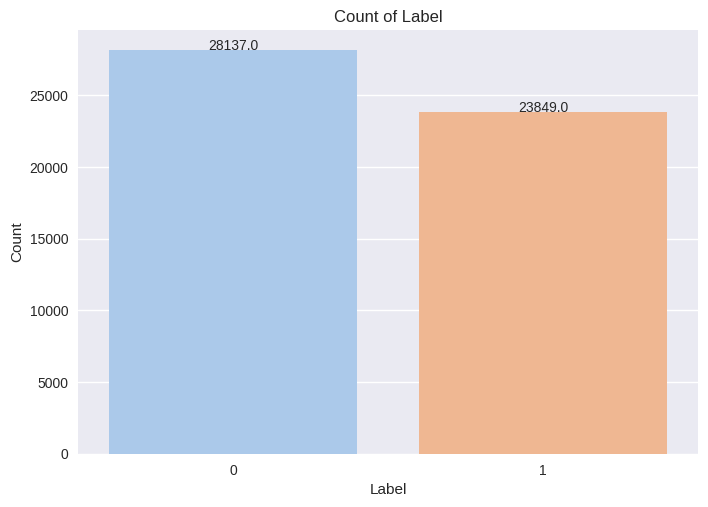

In [ ]:
sns.set_palette("pastel")
ax = sns.countplot(x='Label', data=df)

# Menambahkan jumlah pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title('Count of Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51986 entries, 0 to 28136
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    51986 non-null  object
 1   Label   51986 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Label
count,51986.000000
mean,0.458758
std,0.498301
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## Check Null Values

In [ ]:
df.isnull().sum()

Data     0
Label    0
dtype: int64

<Axes: >

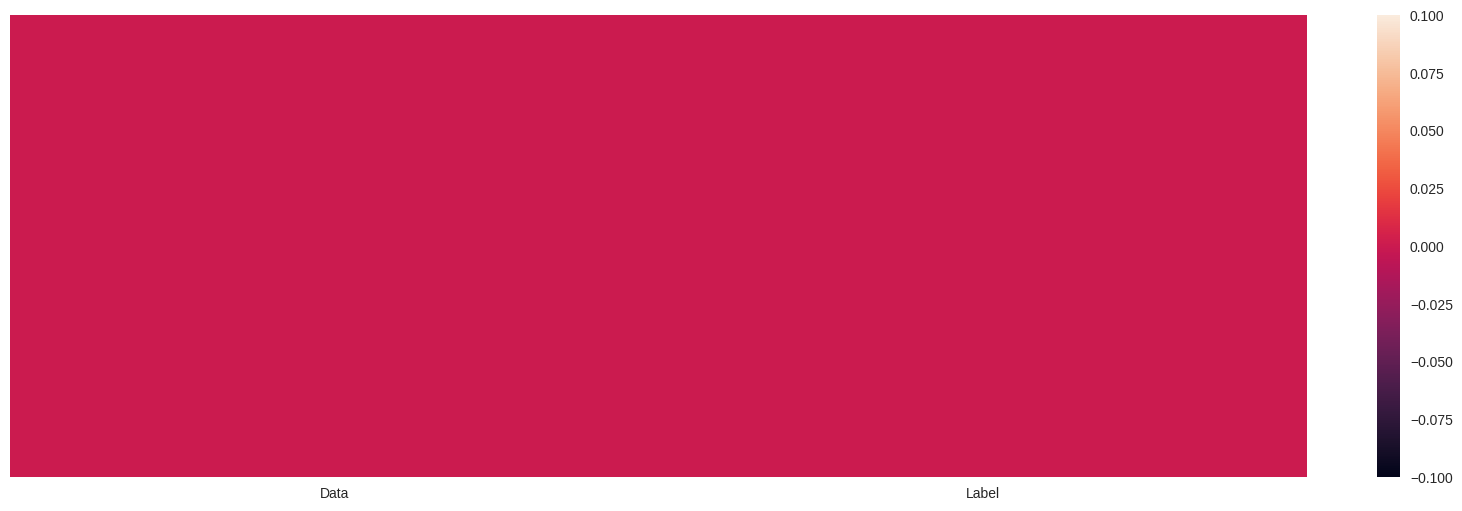

In [ ]:
plt.figure(figsize=(18, 6))

sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cbar_kws={'fraction': 0.02})

## Check Duplicate Values

In [ ]:
df.duplicated().sum()

1416

In [ ]:
df[df.duplicated(keep=False)].sort_values(by=['Data'])

,Data,Label
3278,,0
3277,,0
3041,,0
2818,,0
2817,,0
...,...,...
818,||6,1
844,||UTL_HTTP.REQUEST,1
1263,||UTL_HTTP.REQUEST,1
1325,||UTL_HTTP.REQUEST,1


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print('Total rows : ', df.shape[0])
print('Total columns : ', df.shape[1])

Total rows :  50570
Total columns :  2


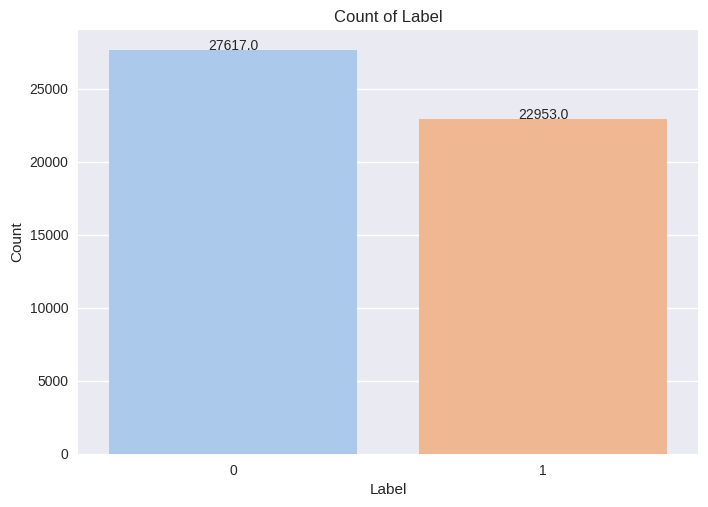

In [ ]:
sns.set_palette("pastel")
ax = sns.countplot(x='Label', data=df)

# Menambahkan jumlah pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title('Count of Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## Data Cleaning

Menghapus outlier

In [ ]:
df.head()

,Data,Label
0,'sqlvuln,1
1,'+sqlvuln,1
2,sqlvuln;,1
3,( sqlvuln ),1
4,a' or 1 = 1--,1


In [ ]:
import re

In [ ]:
def remove_spaces(input_string):
    cleaned = re.sub('\s{2,}', ' ', str(input_string))
    return cleaned.lower().strip()

# print(remove_spaces(sample_query))

In [ ]:
data_special_characters = df.copy()
data_special_characters['Data'] = data_special_characters ['Data'].apply(remove_spaces)
data_special_characters.head()

,Data,Label
0,'sqlvuln,1
1,'+sqlvuln,1
2,sqlvuln;,1
3,( sqlvuln ),1
4,a' or 1 = 1--,1


In [ ]:
data_special_characters.duplicated().sum()

11108

In [ ]:
data_special_characters.drop_duplicates(keep='first', inplace=True)

In [ ]:
data_special_characters.shape

(39462, 2)

**Special characters**

In [ ]:
no_of_special_chars = df['Data'].map(lambda x:len(re.findall('[^a-zA-Z0-9\s]',x)))

no_of_special_chars
# no_of_special_chars.describe()

0        1
1        2
2        1
3        2
4        4
        ..
28132    3
28133    0
28134    2
28135    3
28136    1
Name: Data, Length: 50570, dtype: int64

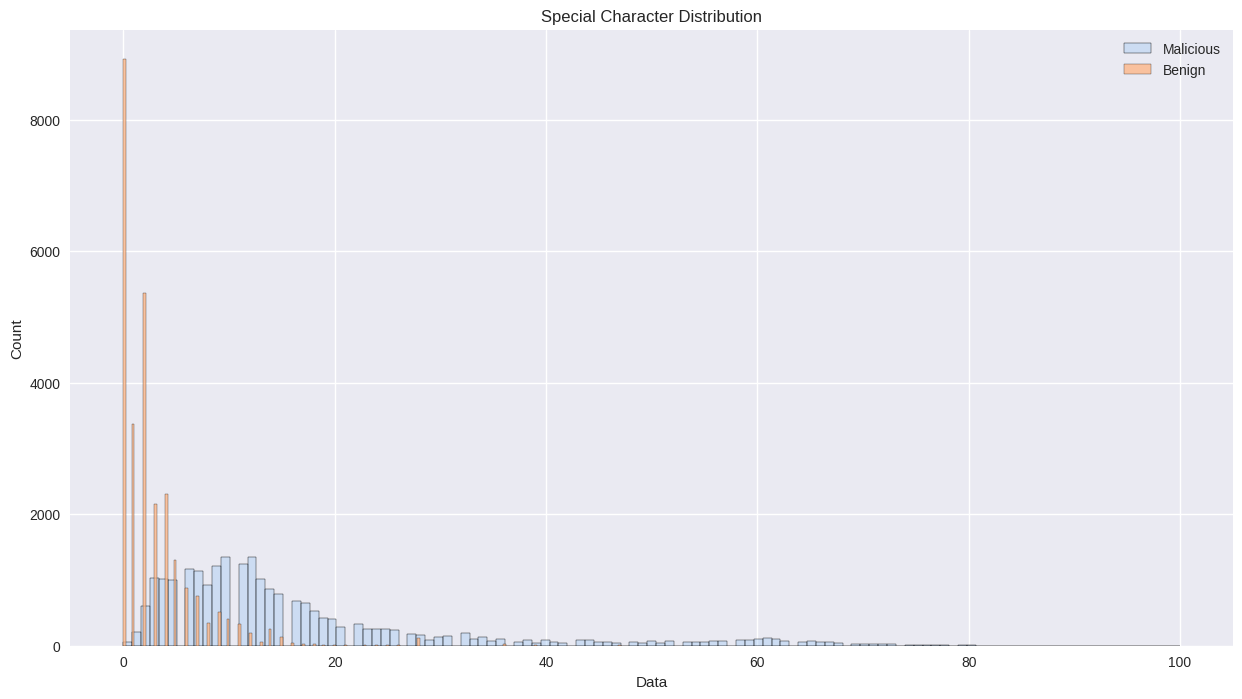

In [ ]:
sns.set_palette("pastel")

fig3, ax = plt.subplots(1, 1, figsize=(15,8))
sns.histplot(no_of_special_chars[df['Label']==1], ax=ax, label='Malicious', binrange=(0,100), alpha=0.4)
sns.histplot(no_of_special_chars[df['Label']==0], ax=ax, label='Benign', binrange=(0,100))

ax.set_title("Special Character Distribution")
ax.legend()

In [ ]:
# data_length = data_cleaned.Data.map(lambda x:len(x.split()))
data_length = data_special_characters.Data.map(lambda x:len(x.split()))
data_length

0        1
1        1
2        1
3        3
4        5
        ..
28132    7
28133    3
28134    7
28135    9
28136    6
Name: Data, Length: 39462, dtype: int64

In [ ]:
data_length.describe()

count    39462.000000
mean        12.605646
std         14.221992
min          0.000000
25%          4.000000
50%          9.000000
75%         15.000000
max        216.000000
Name: Data, dtype: float64

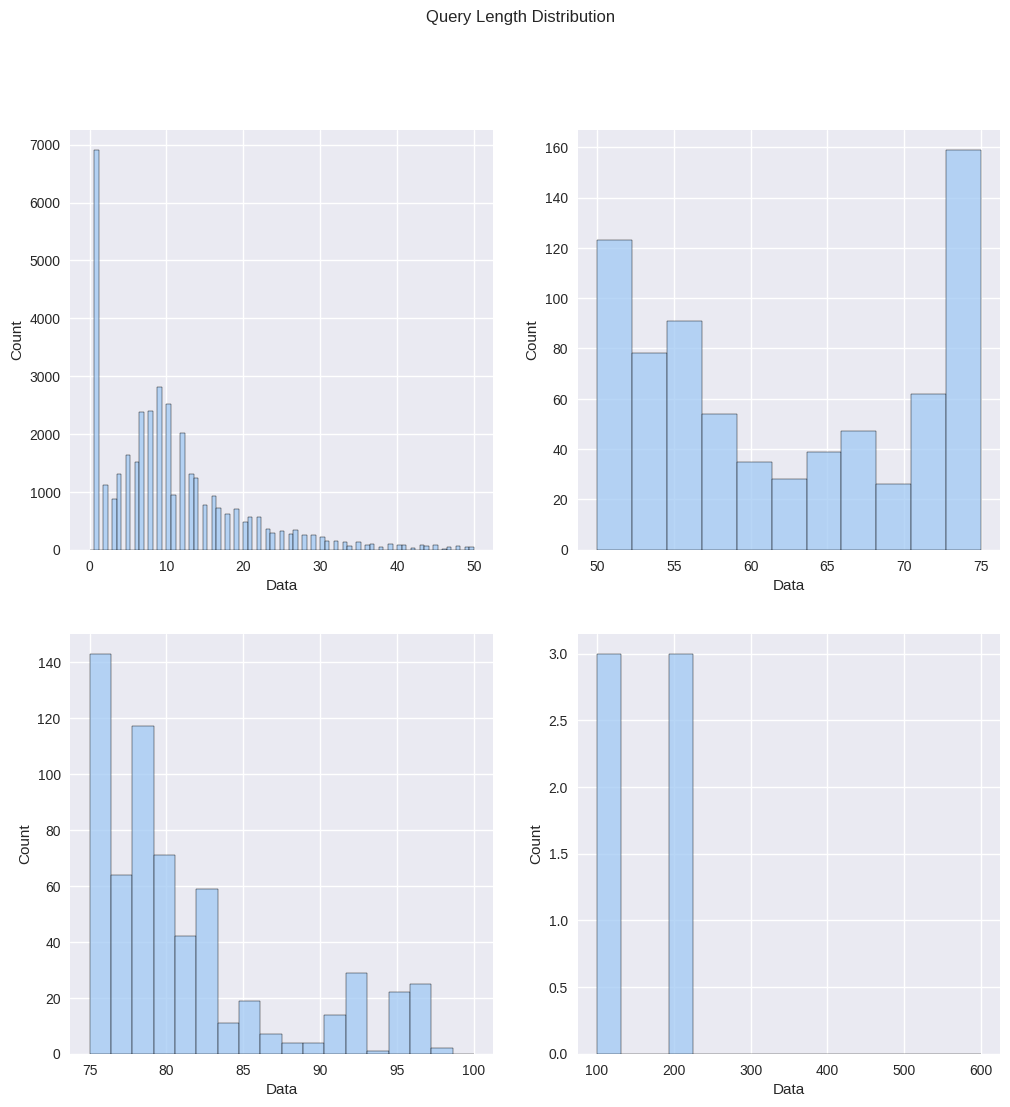

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))

sns.histplot(data_length, binrange=(0,50), ax=ax1)
sns.histplot(data_length, binrange=(50,75), ax=ax2)
sns.histplot(data_length, binrange=(75,100), ax=ax3)
sns.histplot(data_length, binrange=(100,600), ax=ax4)

plt.suptitle("Query Length Distribution");

In [ ]:
print("0 words =", (data_length==0).value_counts()[True])
print("1 words =", (data_length==1).value_counts()[True])
print("2 words =", (data_length==2).value_counts()[True])
print("Less than 5 words  =", (data_length<5).value_counts()[True])
print("Less than 10 words =", (data_length<10).value_counts()[True])
print("Less than 15 words =", (data_length<15).value_counts()[True])
print("Less than 50 words =", (data_length<50).value_counts()[True])
print("More than 90 words =", (data_length>90).value_counts()[True])
# print("More than 500 words =", (data_length>500).value_counts()[True])

0 words = 2
1 words = 6912
2 words = 1112
Less than 5 words  = 10215
Less than 10 words = 20965
Less than 15 words = 28995
Less than 50 words = 38149
More than 90 words = 99


**Outlier** -> 0 words

In [ ]:
label_counts = df['Label'].value_counts()

In [ ]:
percentiles = list(range(10, 101, 10)) + list(range(91, 101))

for per in percentiles:
    print(f'{per} percentile for query length = {np.percentile(data_length, per)}')
    if per != percentiles[-1]:
        print('-' * 40)

10 percentile for query length = 1.0
----------------------------------------
20 percentile for query length = 2.0
----------------------------------------
30 percentile for query length = 5.0
----------------------------------------
40 percentile for query length = 8.0
----------------------------------------
50 percentile for query length = 9.0
----------------------------------------
60 percentile for query length = 11.0
----------------------------------------
70 percentile for query length = 13.0
----------------------------------------
80 percentile for query length = 18.0
----------------------------------------
90 percentile for query length = 26.0
----------------------------------------
100 percentile for query length = 216.0
91 percentile for query length = 27.0
----------------------------------------
92 percentile for query length = 29.0
----------------------------------------
93 percentile for query length = 31.0
----------------------------------------
94 percentile for

In [ ]:
data_special_characters[data_special_characters['Data'].map(lambda x:len(x.split())) == 0]

,Data,Label
23837,,1
403,,0


In [ ]:
data_special_characters[data_special_characters['Data'].map(lambda x:len(x.split())) == 216]

,Data,Label
16559,de]]> </email_address> <find_account_answer> <...,0


In [ ]:
data_special_characters.drop([23837, 403], inplace=True)
data_special_characters.shape

(39458, 2)

# Tokenization

Memecah data menjadi unit-unit yang lebih kecil

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=2, max_df=0.7, max_features=4096)
posts_c = vectorizer.fit_transform(data_special_characters['Data'].values.astype('U')).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.7, max_features=4096)
posts_tfid = tfidf_vectorizer.fit_transform(data_special_characters['Data'].values.astype('U')).toarray()


In [ ]:
with open('/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/tfidf_vectorizer', 'wb') as file:
  pickle.dump(tfidf_vectorizer, file)

with open('/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/vectorizer.sav', 'wb') as file:
  pickle.dump(vectorizer, file)

# Baseline and Feature Selection

In [ ]:
with open('/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/data_spcl.df', 'wb') as file:
  pickle.dump(data_special_characters, file)

In [ ]:
X_c = posts_c
y = data_special_characters['Label']

X_tfid = posts_tfid
y = data_special_characters['Label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train_c, X_test_c, y_train, y_test = train_test_split(X_c, y, test_size=0.30, random_state=42)

X_train_tfid, X_test_tfid, y_train, y_test = train_test_split(X_tfid, y, test_size=0.30, random_state=42)

# SVM

## TFIDF Vectorizer

In [ ]:
svc_model_tfidf = SVC()
svc_model_tfidf.fit(X_train_tfid, y_train)

SVC()

In [ ]:
# cross_val_score(svc_model_tfidf, X_train_tfid, y_train, cv=3)

In [ ]:
y_pred = svc_model_tfidf.predict(X_test_tfid)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8234
           1       1.00      0.98      0.99      3604

    accuracy                           0.99     11838
   macro avg       1.00      0.99      0.99     11838
weighted avg       0.99      0.99      0.99     11838



<Axes: >

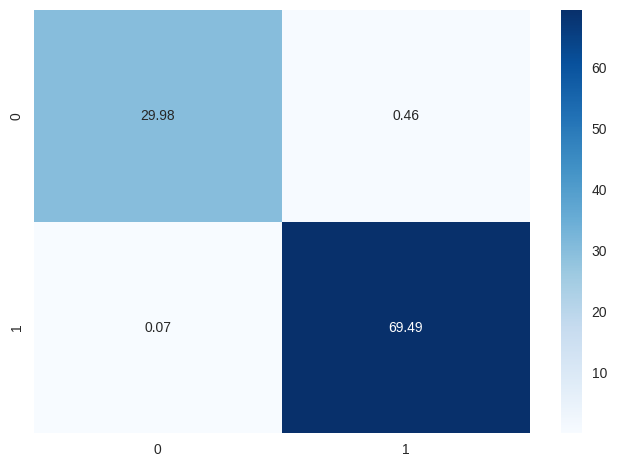

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
sns.heatmap((cnf_matrix / np.sum(cnf_matrix)*100), annot=True, fmt=".2f", cmap="Blues")

## Count Vectorizer

In [ ]:
svc_model_c = SVC()
svc_model_c.fit(X_train_c, y_train)

SVC()

In [ ]:
# cross_val_score(svc_model_c, X_train_vec, y_train, cv=3)

In [ ]:
y_pred = svc_model_c.predict(X_test_c)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8234
           1       1.00      0.98      0.99      3604

    accuracy                           0.99     11838
   macro avg       1.00      0.99      0.99     11838
weighted avg       0.99      0.99      0.99     11838



<Axes: >

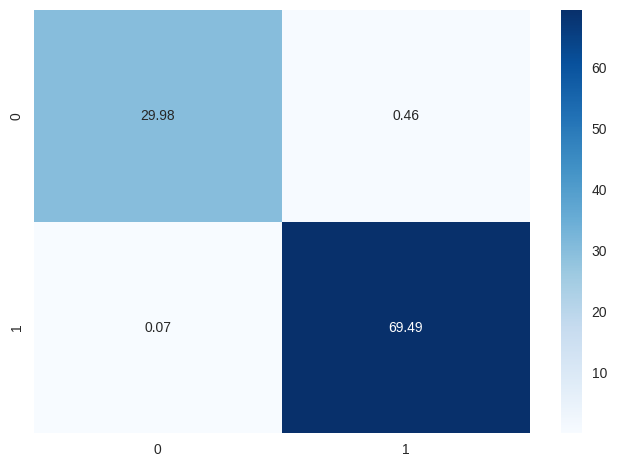

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
sns.heatmap((cnf_matrix / np.sum(cnf_matrix)*100), annot=True, fmt=".2f", cmap="Blues")

# NN

## TFIDF Vectorizer

In [ ]:
mlp_model_tfidf = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=500)
mlp_model_tfidf.fit(X_train_tfid, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500)

In [ ]:
# cross_val_score(mlp_model_tfidf, X_train_tfidfvec, y_train, cv=3)

In [ ]:
y_pred = mlp_model_tfidf.predict(X_test_tfid)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8234
           1       1.00      0.99      0.99      3604

    accuracy                           1.00     11838
   macro avg       1.00      0.99      0.99     11838
weighted avg       1.00      1.00      1.00     11838



<Axes: >

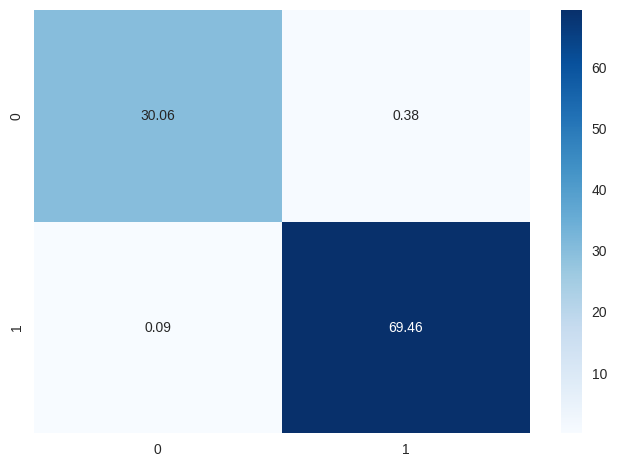

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
sns.heatmap((cnf_matrix / np.sum(cnf_matrix)*100), annot=True, fmt=".2f", cmap="Blues")

## Count Vectorizer

In [ ]:
mlp_model_c =  MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=500)
mlp_model_c.fit(X_train_c, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500)

In [ ]:
# cross_val_score(mlp_model_c, X_train_vec, y_train, cv=3)

In [ ]:
y_pred = mlp_model_c.predict(X_test_c)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8234
           1       1.00      0.99      0.99      3604

    accuracy                           0.99     11838
   macro avg       1.00      0.99      0.99     11838
weighted avg       0.99      0.99      0.99     11838



<Axes: >

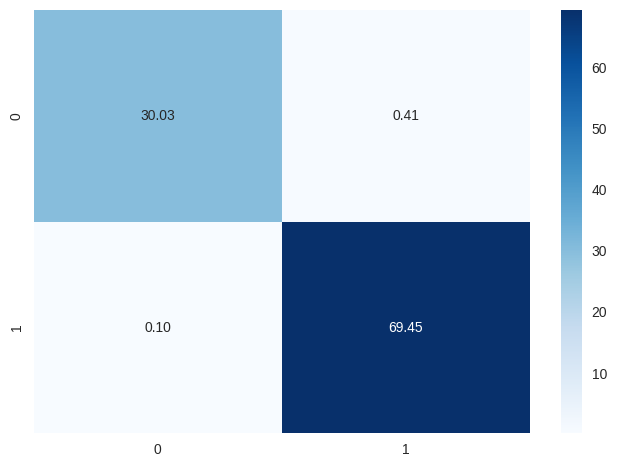

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
sns.heatmap((cnf_matrix / np.sum(cnf_matrix)*100), annot=True, fmt=".2f", cmap="Blues")

# Ensemble Learning

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(random_state=42)

In [ ]:
# Model stacking
estimators = [
    ('random_forest', random_forest),
    ('adaboost', adaboost),
    ('logistic_regression', logistic_regression)]

## TFIDF Vectorizer

In [ ]:
el_model_tfidf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
el_model_tfidf.fit(X_train_tfid, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

StackingClassifier(estimators=[('random_forest',
                                RandomForestClassifier(random_state=42)),
                               ('adaboost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                                   n_estimators=100,
                                                   random_state=42)),
                               ('logistic_regression',
                                LogisticRegression(random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
# cross_val_score(el_model_tfidf, X_train_tfidfvec, y_train, cv=3)

In [ ]:
y_pred = el_model_tfidf.predict(X_test_tfid)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8234
           1       1.00      0.99      0.99      3604

    accuracy                           1.00     11838
   macro avg       1.00      0.99      1.00     11838
weighted avg       1.00      1.00      1.00     11838



<Axes: >

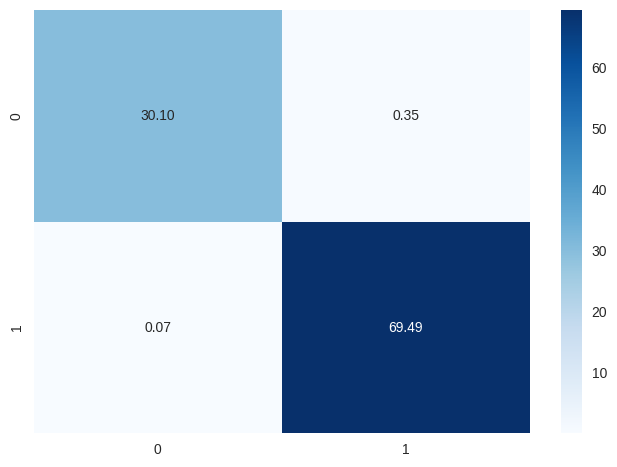

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
sns.heatmap((cnf_matrix / np.sum(cnf_matrix)*100), annot=True, fmt=".2f", cmap="Blues")

In [ ]:
with open('/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/tfidf_vectorizer', 'wb') as file:
  pickle.dump(tfidf_vectorizer, file)

with open('/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/vectorizer.sav', 'wb') as file:
  pickle.dump(vectorizer, file)

## Count Vectorizer

In [ ]:
el_model_c =  StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
el_model_c.fit(X_train_c, y_train)

In [ ]:
# cross_val_score(el_model_c, X_train_vec, y_train, cv=3)

In [ ]:
# y_pred = el_model_c.predict(X_test_vec)
# print(classification_report(y_test, y_pred))

In [ ]:
# cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
# sns.heatmap((cnf_matrix / np.sum(cnf_matrix)*100), annot=True, fmt=".2f", cmap="Blues")

# Save the Model

In [ ]:
import joblib

# Simpan model-model individu
joblib.dump(random_forest, "/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/random_forest_model.pkl")
joblib.dump(adaboost, "/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/adaboost_model.pkl")
joblib.dump(logistic_regression, "/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/logistic_regression_model.pkl")

# Simpan model stacking
joblib.dump(el_model_tfidf, "/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/stacking_model.pkl")


['/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/stacking_model.pkl']

# Trial the Model

## Load Model

In [ ]:
import joblib

# Simpan model-model individu
random_forest = joblib.load("/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/random_forest_model.pkl")
adaboost = joblib.load("/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/adaboost_model.pkl")
logistic_regression = joblib.load("/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/logistic_regression_model.pkl")

# Simpan model stacking
el_model_tfidf = joblib.load("/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/stacking_model.pkl")


## Load vectorize

In [ ]:
# with open('/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/tfidf_vectorizer.sav', 'wb') as file:
#   pickle.dump(tfidf_vectorizer, file)

tfidf_vectorizer = pickle.load(open("/content/drive/MyDrive/KEAMANAN JARINGAN KOMPUTER/tfidf_vectorizer", 'rb'))


## Clean query

In [ ]:
def clean_query(input_val):
    input_val=input_val.replace('\n', '')
    input_val=input_val.replace('%20', ' ')
    input_val=input_val.replace('=', ' = ')
    input_val=input_val.replace('((', ' (( ')
    input_val=input_val.replace('))', ' )) ')
    input_val=input_val.replace('(', ' ( ')
    input_val=input_val.replace(')', ' ) ')

    return input_val

In [ ]:
def predict_sqli_attack():
    repeat = True

    input_val = input("Input your query : ")

    if input_val == '0':
        repeat = False

    input_val = clean_query(input_val)
    input_val = [input_val]

    input_vectorizer = tfidf_vectorizer.transform(input_val).toarray()

    result = el_model_tfidf.predict(input_vectorizer)
    print(result)

    if result > 0.5:
        print("This is SQL injection")
    elif result <= 0.5:
        print("It safe")

In [ ]:
predict_sqli_attack()

Input your query : ') or ('1'='1--
[1]
This is SQL injection


In [ ]:
predict_sqli_attack()

Input your query : FROM all_tab_columns) WHERE LIMIT=1)) AND 'i'='i
[0]
It safe


In [ ]:
predict_sqli_attack()

Input your query : admin'--
[1]
This is SQL injection


In [ ]:
predict_sqli_attack()

Input your query : ' UNION SELECT 1, 'anotheruser', 'doesnt matter', 1--
[0]
It safe
